# Week 8 Practice

## Black-Scholes Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

###  European Options

Non-Dividend Paying Options

In [2]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [3]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [4]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

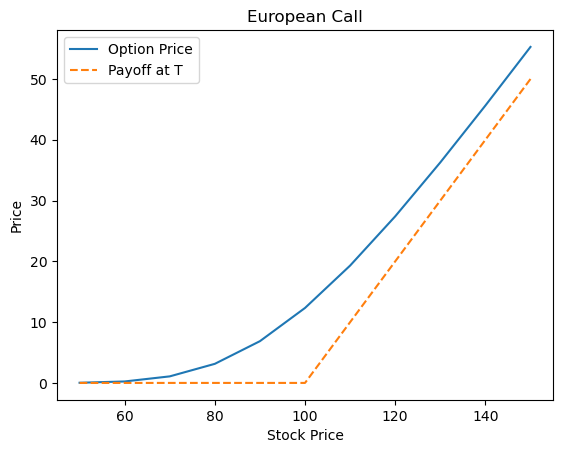

In [5]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Dividend Paying Options

In [6]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [7]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [8]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

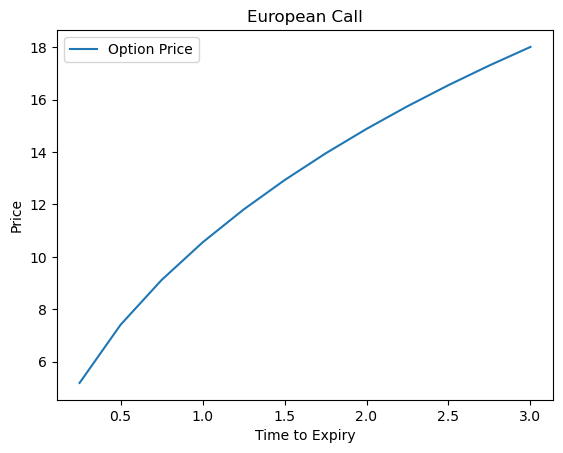

In [9]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

### Option Trading

Has Black Scholes correctly predicted the market value of the options?

In [11]:
AAPL = yf.Ticker('AAPL')
opt = AAPL.option_chain('2023-11-10')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL231110C00050000,2023-10-25 14:10:09+00:00,50.0,121.90,128.80,128.95,0.000000,0.000000,1.0,11,0.000010,True,REGULAR,USD
1,AAPL231110C00060000,2023-10-26 14:01:29+00:00,60.0,109.94,118.85,119.10,0.000000,0.000000,1.0,0,2.875003,True,REGULAR,USD
2,AAPL231110C00090000,2023-11-03 14:13:05+00:00,90.0,88.10,88.90,89.15,3.250000,3.830289,3.0,3,2.289067,True,REGULAR,USD
3,AAPL231110C00100000,2023-11-02 18:57:26+00:00,100.0,77.47,78.80,79.15,0.000000,0.000000,7.0,12,1.562502,True,REGULAR,USD
4,AAPL231110C00105000,2023-10-30 17:29:00+00:00,105.0,65.10,73.95,74.15,0.000000,0.000000,1.0,4,1.890626,True,REGULAR,USD
5,AAPL231110C00110000,2023-11-03 17:36:16+00:00,110.0,65.50,69.00,69.20,0.000000,0.000000,80.0,19,1.851563,True,REGULAR,USD
6,AAPL231110C00115000,2023-10-13 18:35:44+00:00,115.0,64.80,63.85,64.10,0.000000,0.000000,3.0,34,1.187504,True,REGULAR,USD
7,AAPL231110C00120000,2023-10-16 14:21:32+00:00,120.0,58.55,58.90,59.15,0.000000,0.000000,2.0,13,1.390628,True,REGULAR,USD
8,AAPL231110C00125000,2023-11-03 18:38:04+00:00,125.0,50.90,53.90,54.20,0.000000,0.000000,2.0,44,1.320316,True,REGULAR,USD
9,AAPL231110C00130000,2023-11-03 19:59:54+00:00,130.0,46.60,48.95,49.15,0.000000,0.000000,4.0,15,1.191410,True,REGULAR,USD


In [12]:
data = yf.download("AAPL", start="2022-11-03", end="2023-11-03")

[*********************100%%**********************]  1 of 1 completed


In [13]:
data['Adj Close']

Date
2022-11-03    138.060974
2022-11-04    137.792114
2022-11-07    138.329819
2022-11-08    138.907349
2022-11-09    134.297012
                 ...    
2023-10-27    168.220001
2023-10-30    170.289993
2023-10-31    170.770004
2023-11-01    173.970001
2023-11-02    177.570007
Name: Adj Close, Length: 251, dtype: float64

In [14]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1/52
r = 0.0382
q = 0.0061
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.24478020111787613

In [15]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [18]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error
0,AAPL231110C00050000,2023-10-25 14:10:09+00:00,50.0,121.90,128.80,128.95,0.000000,0.000000,1.0,11,0.000010,True,REGULAR,USD,127.59,4.667760
1,AAPL231110C00060000,2023-10-26 14:01:29+00:00,60.0,109.94,118.85,119.10,0.000000,0.000000,1.0,0,2.875003,True,REGULAR,USD,117.59,6.958341
2,AAPL231110C00090000,2023-11-03 14:13:05+00:00,90.0,88.10,88.90,89.15,3.250000,3.830289,3.0,3,2.289067,True,REGULAR,USD,87.62,-0.544835
3,AAPL231110C00100000,2023-11-02 18:57:26+00:00,100.0,77.47,78.80,79.15,0.000000,0.000000,7.0,12,1.562502,True,REGULAR,USD,77.62,0.193623
4,AAPL231110C00105000,2023-10-30 17:29:00+00:00,105.0,65.10,73.95,74.15,0.000000,0.000000,1.0,4,1.890626,True,REGULAR,USD,72.63,11.566820
5,AAPL231110C00110000,2023-11-03 17:36:16+00:00,110.0,65.50,69.00,69.20,0.000000,0.000000,80.0,19,1.851563,True,REGULAR,USD,67.63,3.251908
6,AAPL231110C00115000,2023-10-13 18:35:44+00:00,115.0,64.80,63.85,64.10,0.000000,0.000000,3.0,34,1.187504,True,REGULAR,USD,62.63,-3.348765
7,AAPL231110C00120000,2023-10-16 14:21:32+00:00,120.0,58.55,58.90,59.15,0.000000,0.000000,2.0,13,1.390628,True,REGULAR,USD,57.64,-1.554227
8,AAPL231110C00125000,2023-11-03 18:38:04+00:00,125.0,50.90,53.90,54.20,0.000000,0.000000,2.0,44,1.320316,True,REGULAR,USD,52.64,3.418468
9,AAPL231110C00130000,2023-11-03 19:59:54+00:00,130.0,46.60,48.95,49.15,0.000000,0.000000,4.0,15,1.191410,True,REGULAR,USD,47.64,2.231760


In [19]:
opt.calls['estimate_error'] = ((opt.calls['BSMPrice'] - opt.calls['lastPrice'])/opt.calls['lastPrice'])*100
opt.calls['estimate_error']

0       4.667760
1       6.958341
2      -0.544835
3       0.193623
4      11.566820
5       3.251908
6      -3.348765
7      -1.554227
8       3.418468
9       2.231760
10     -3.854824
11      6.506365
12      5.419799
13      8.541044
14     31.642412
15     -3.766478
16     -4.322581
17     31.891394
18     -2.674173
19     -2.669246
20     -6.440958
21      5.712788
22     -8.540373
23     -9.101796
24    -10.563380
25    -11.845494
26    -14.162162
27    -14.074074
28    -12.000000
29     -3.112840
30     24.137931
31     87.500000
32    191.666667
33    200.000000
34    200.000000
35      0.000000
36      0.000000
37   -100.000000
38   -100.000000
39   -100.000000
40   -100.000000
41   -100.000000
42   -100.000000
43   -100.000000
44   -100.000000
45   -100.000000
46   -100.000000
47   -100.000000
48   -100.000000
49   -100.000000
50   -100.000000
51   -100.000000
52   -100.000000
53   -100.000000
54   -100.000000
Name: estimate_error, dtype: float64

In [20]:
opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     55.000000
mean     -19.768530
std       72.900947
min     -100.000000
25%     -100.000000
50%       -3.854824
75%        4.043114
max      200.000000
Name: estimate_error, dtype: float64

Our mean estimation error is -19.76%, with a standard deviation of 72.9% points. Our median is even more promising at around -3.85%. Our standard deviation still seems a bit high.

Text(0.5, 1.0, 'Histogram of Estimate Error')

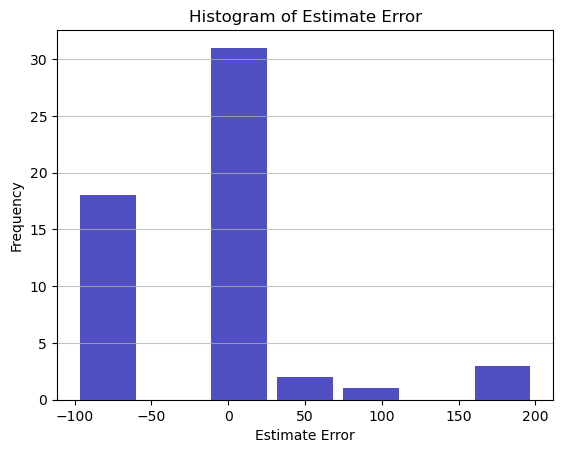

In [21]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

### Mibian - Options Pricing Library

MibianLib is an open source python library for options pricing. You can use it to calculate the price, the implied volatility, the greeks or the put/call parity of an option using the Black-Scholes(-Merton) pricing models.

In [22]:
pip install mibian

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4033 sha256=a140e35fa5430ac0743fe5e4af5893747614f9d7ab4f24f0ee95a354c992a587
  Stored in directory: c:\users\yueya\appdata\local\pip\cache\wheels\e7\5e\5c\da32a012a1a27b1f6f61a7744eac2eb20ab4854aba3143b711
Successfully built mibian


In [23]:
import mibian as mb

In [24]:
option_100 = mb.BS([S, 150, r*100, 30], volatility = vol*100)

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [25]:
option_100.callPrice

28.06701604988899

In [26]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 7], volatility = vol*100).callPrice

In [27]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL231110C00050000,2023-10-25 14:10:09+00:00,50.0,121.90,128.80,128.95,0.000000,0.000000,1.0,11,0.000010,True,REGULAR,USD,127.59,4.667760,127.59
1,AAPL231110C00060000,2023-10-26 14:01:29+00:00,60.0,109.94,118.85,119.10,0.000000,0.000000,1.0,0,2.875003,True,REGULAR,USD,117.59,6.958341,117.60
2,AAPL231110C00090000,2023-11-03 14:13:05+00:00,90.0,88.10,88.90,89.15,3.250000,3.830289,3.0,3,2.289067,True,REGULAR,USD,87.62,-0.544835,87.62
3,AAPL231110C00100000,2023-11-02 18:57:26+00:00,100.0,77.47,78.80,79.15,0.000000,0.000000,7.0,12,1.562502,True,REGULAR,USD,77.62,0.193623,77.63
4,AAPL231110C00105000,2023-10-30 17:29:00+00:00,105.0,65.10,73.95,74.15,0.000000,0.000000,1.0,4,1.890626,True,REGULAR,USD,72.63,11.566820,72.64
5,AAPL231110C00110000,2023-11-03 17:36:16+00:00,110.0,65.50,69.00,69.20,0.000000,0.000000,80.0,19,1.851563,True,REGULAR,USD,67.63,3.251908,67.64
6,AAPL231110C00115000,2023-10-13 18:35:44+00:00,115.0,64.80,63.85,64.10,0.000000,0.000000,3.0,34,1.187504,True,REGULAR,USD,62.63,-3.348765,62.64
7,AAPL231110C00120000,2023-10-16 14:21:32+00:00,120.0,58.55,58.90,59.15,0.000000,0.000000,2.0,13,1.390628,True,REGULAR,USD,57.64,-1.554227,57.65
8,AAPL231110C00125000,2023-11-03 18:38:04+00:00,125.0,50.90,53.90,54.20,0.000000,0.000000,2.0,44,1.320316,True,REGULAR,USD,52.64,3.418468,52.65
9,AAPL231110C00130000,2023-11-03 19:59:54+00:00,130.0,46.60,48.95,49.15,0.000000,0.000000,4.0,15,1.191410,True,REGULAR,USD,47.64,2.231760,47.65


In [28]:
opt.calls['estimate_error_mb'] = ((opt.calls['MB_BSMPrice'] - opt.calls['lastPrice'] )/opt.calls['lastPrice'] )*100
opt.calls['estimate_error_mb']

0       4.667760
1       6.967437
2      -0.544835
3       0.206532
4      11.582181
5       3.267176
6      -3.333333
7      -1.537148
8       3.438114
9       2.253219
10     -3.832281
11      6.534653
12      5.451128
13      8.541044
14     31.683992
15     -3.735091
16     -4.290323
17     31.937414
18     -2.638987
19     -2.630561
20     -6.399670
21      5.712788
22     -8.488613
23     -9.101796
24    -10.492958
25    -11.759657
26    -14.054054
27    -13.925926
28    -12.000000
29     -2.723735
30     24.137931
31     87.500000
32    191.666667
33    200.000000
34    200.000000
35      0.000000
36      0.000000
37   -100.000000
38   -100.000000
39   -100.000000
40   -100.000000
41   -100.000000
42   -100.000000
43   -100.000000
44   -100.000000
45   -100.000000
46   -100.000000
47   -100.000000
48   -100.000000
49   -100.000000
50   -100.000000
51   -100.000000
52   -100.000000
53   -100.000000
54   -100.000000
Name: estimate_error_mb, dtype: float64

In [29]:
opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     55.000000
mean     -19.744381
std       72.906530
min     -100.000000
25%     -100.000000
50%       -3.832281
75%        4.052937
max      200.000000
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

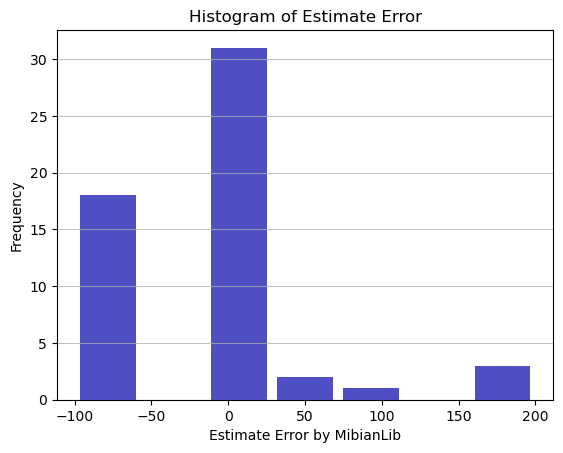

In [30]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

The mean, median, and the standard deviation are quite similar to what we calculated.